In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [53]:
# Imports for project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [5]:
# Dataset
path= "bank-full.csv"

dataframe = pd.read_csv((path), delimiter=';', quotechar='"')

In [6]:
print(dataframe['y'].unique())


['no' 'yes']


In [7]:
dataframe.describe() # for numerical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Finding all the features and categories included
for column in dataframe.columns:
    if dataframe[column].dtype == 'object' or dataframe[column].dtype == 'int64':
        print(f"Feature: {column}")
        print(f"Data Type: {dataframe[column].dtype}")
        
        if dataframe[column].dtype == 'object':  # Check for categorical features
            print(f"Categories: {dataframe[column].unique()}")
        
        print("-" * 50)


Feature: age
Data Type: int64
--------------------------------------------------
Feature: job
Data Type: object
Categories: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Feature: marital
Data Type: object
Categories: ['married' 'single' 'divorced']
--------------------------------------------------
Feature: education
Data Type: object
Categories: ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Feature: default
Data Type: object
Categories: ['no' 'yes']
--------------------------------------------------
Feature: balance
Data Type: int64
--------------------------------------------------
Feature: housing
Data Type: object
Categories: ['yes' 'no']
--------------------------------------------------
Feature: loan
Data Type: object
Categories: ['no' 'yes']
------------------------------------

**Exploring and preparing the dataset for model implementation**

* Find Unwanted columns
* Find missing values
* Explore categorical feature
* Relation between categorical features and label
* Find continous features
* Find outliers in numerical features
* Check the balance of the dataset based on target values in classification



In [9]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
missing_values = dataframe.isnull().sum()

# Filter columns with missing values
features_na = missing_values[missing_values > 0]

# If there are missing values
if not features_na.empty:
    for feature, count in features_na.items():
        missing_percentage = np.round(count / len(df) * 100, 4)
        print(f"{feature}: {missing_percentage} % missing values")
else:
    print("No missing values")

No missing values


In [11]:
for column in dataframe.columns:
    if dataframe[column].dtype == 'object': # Check for categorical features
        num_categories = len(dataframe[column].unique()) 
        print(f"Feature: {column}")
        print(f"Number of Categories: {num_categories}")
        print("-" * 50)


Feature: job
Number of Categories: 12
--------------------------------------------------
Feature: marital
Number of Categories: 3
--------------------------------------------------
Feature: education
Number of Categories: 4
--------------------------------------------------
Feature: default
Number of Categories: 2
--------------------------------------------------
Feature: housing
Number of Categories: 2
--------------------------------------------------
Feature: loan
Number of Categories: 2
--------------------------------------------------
Feature: contact
Number of Categories: 3
--------------------------------------------------
Feature: month
Number of Categories: 12
--------------------------------------------------
Feature: poutcome
Number of Categories: 4
--------------------------------------------------
Feature: y
Number of Categories: 2
--------------------------------------------------


In [12]:
continuous_features = [column for column in dataframe.columns if dataframe[column].dtype in ['int64', 'float64']]

# Print the continuous features
print("Continuous Features:")
for feature in continuous_features:
    print(feature)

Continuous Features:
age
balance
day
duration
campaign
pdays
previous


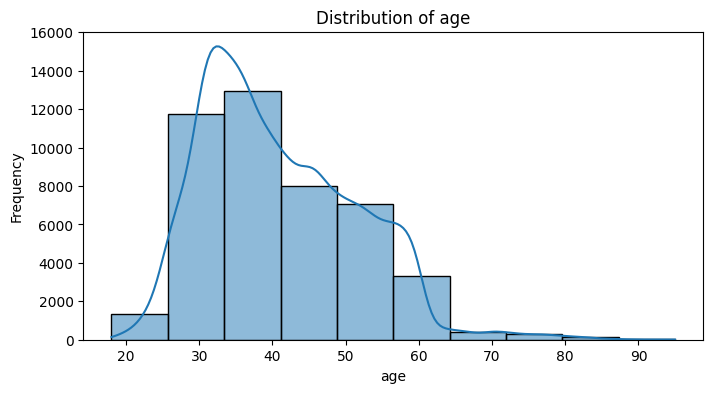

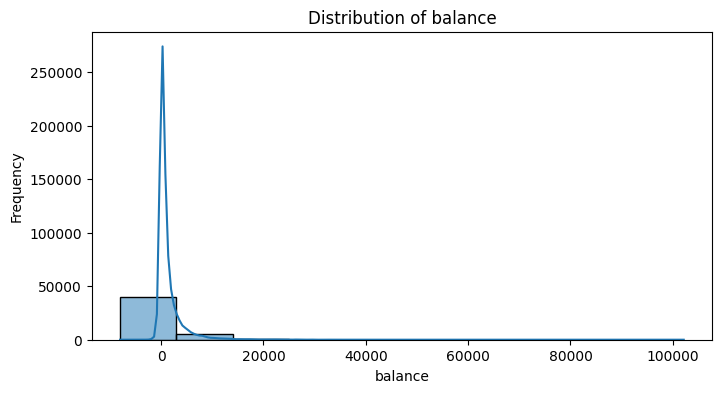

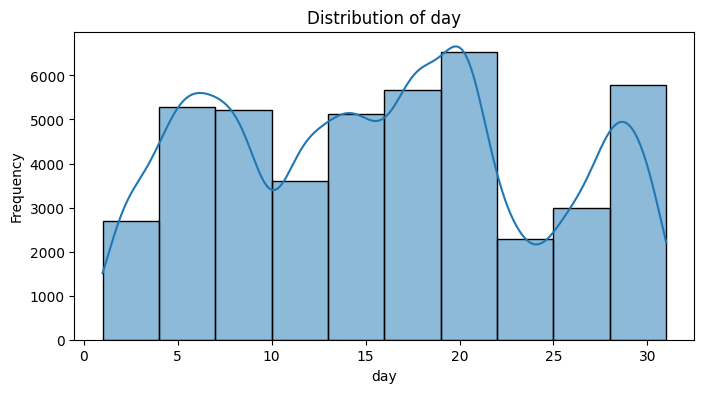

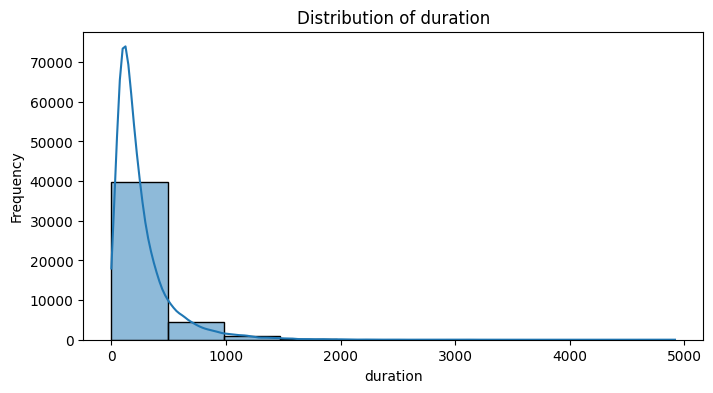

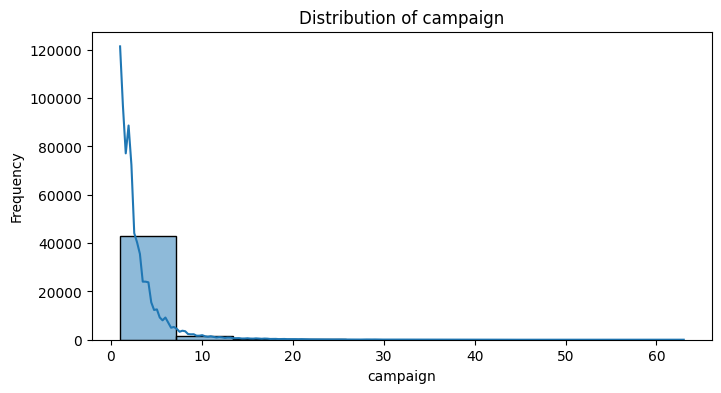

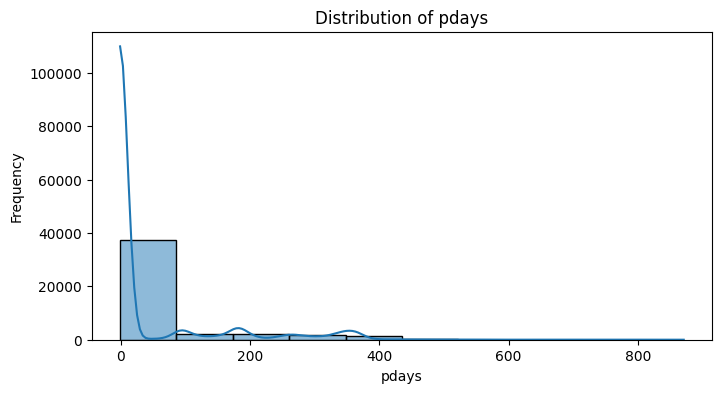

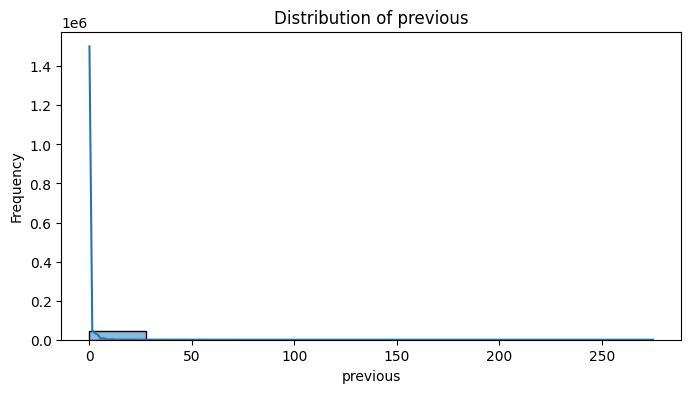

In [13]:
# plot to see spread of data
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

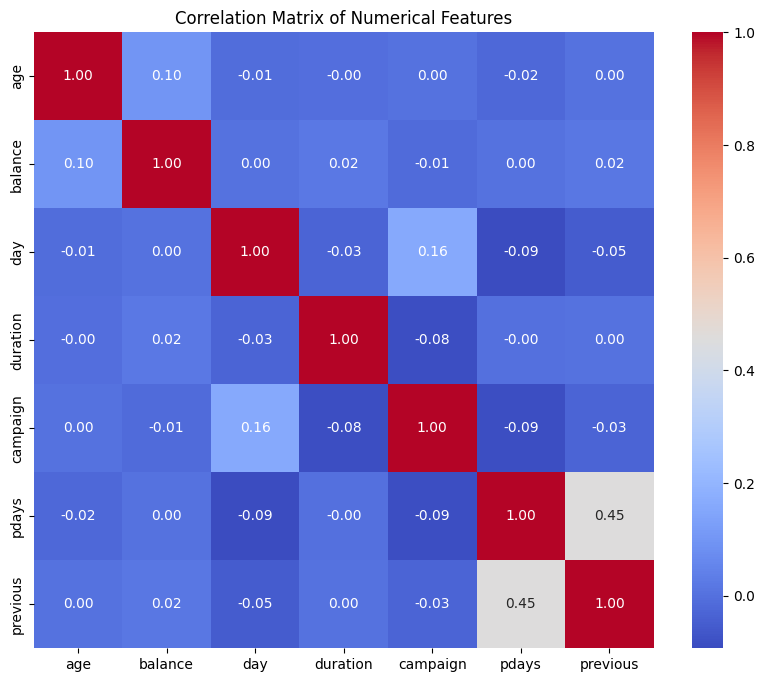

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

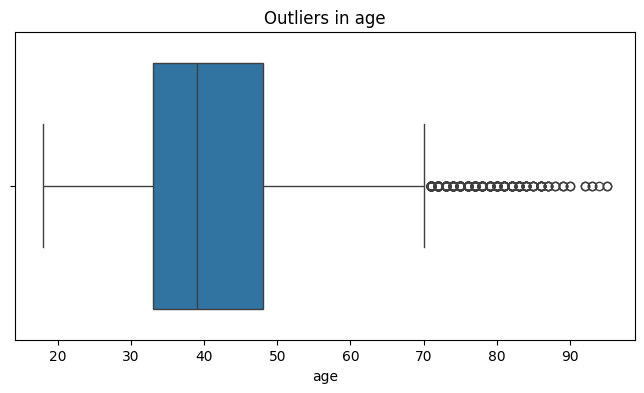

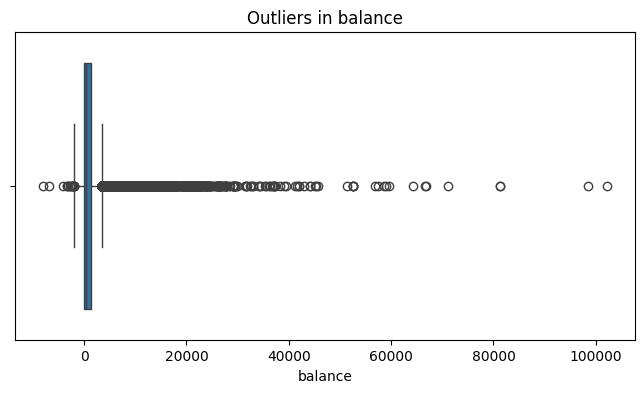

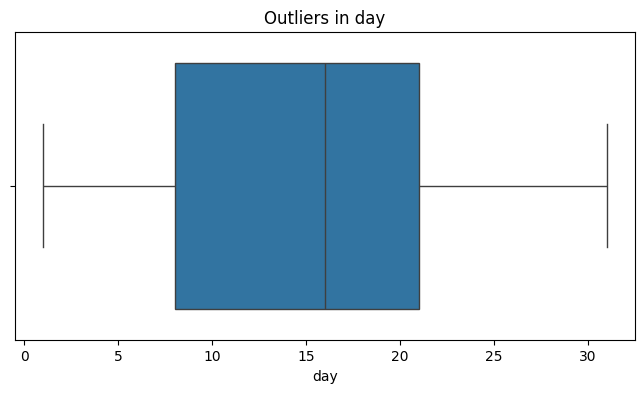

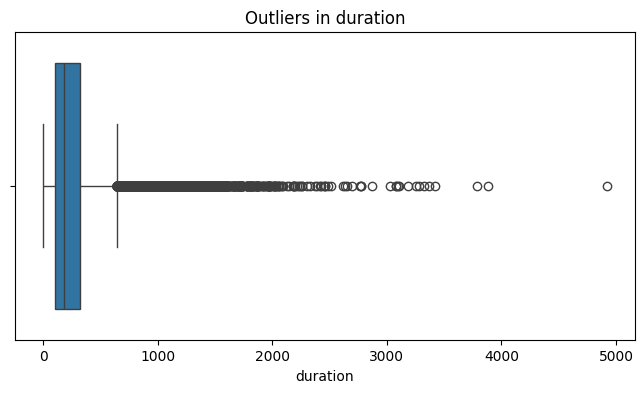

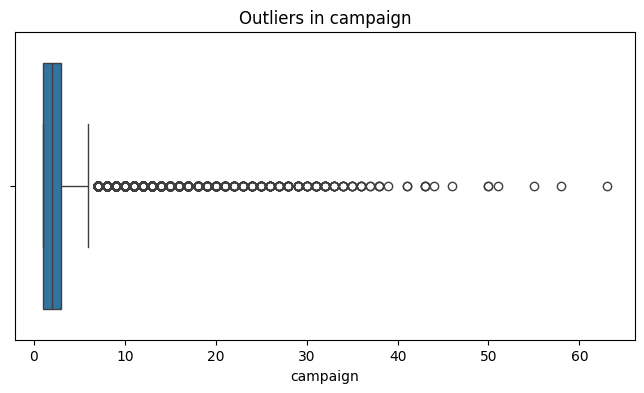

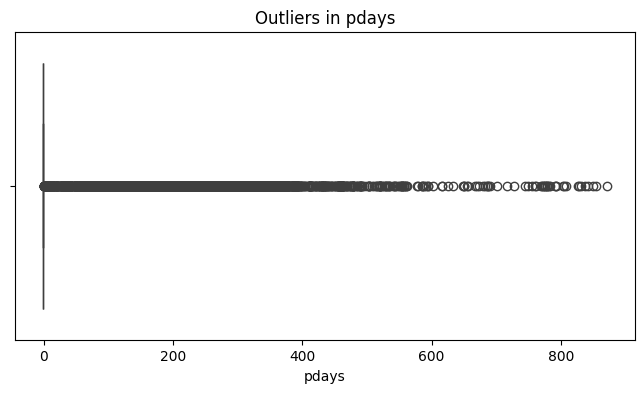

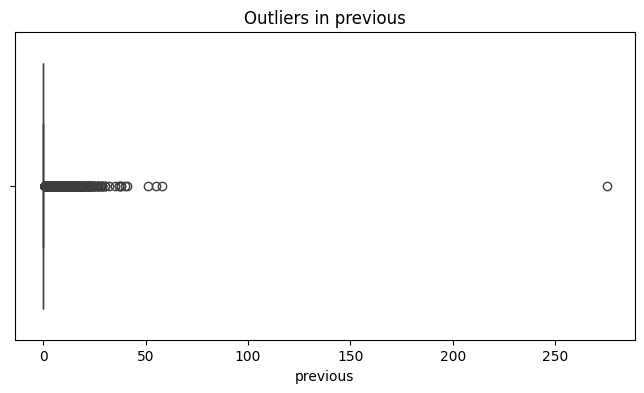

In [15]:
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataframe[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

The data set consists of: 

9 categorical features
no missing values
outliers within dataset in numerical (continuous features); age, balance, duration, pdays, previous campaign


Problem statement: Classification problem, where two models (random forest and CNN) must be trained to predict if a client will subscribe a term deposit based on the data. 

Feature engineering: 

Feature Selection: Remove irrelevant/redundant features.

Feature Transformation: Normalize/standardize numerical features.

Encoding Categorical Variables:

One-hot encoding for nominal categories.
Label encoding for ordinal categories.

Split Data:

Split the dataset into:
Training set
Validation set ( for hyperparameter tuning).
Test set


In [30]:
# Duplicate dataset to trim and prepare for model implementation

df = dataframe.copy()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df.shape

(45211, 17)

trimming the unwanted features in a dataset requires attention to the range of values affecting it via features.

In [31]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

The target feature being "y" for the problem. grouping by the other features allows us to understand the size of the feature affecting. This process will be repeated for other features as well.

In [32]:
df.drop(['default'],axis=1,inplace=True)

To accurately classify whether a customer would infact use the services, attributes that prove highly correlated and redundant should be trimmed as well. Duration is one such feature.

In [33]:
df.drop(['duration'],axis=1,inplace=True)

Removing outliers within the data set to maintain accuracy

In [34]:
def find_outlier_indices(df, columns):
    outlier_indices = set()
    for column in columns:
        if column in df.select_dtypes(include=['float64', 'int64']).columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"Feature: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            # Find indices of rows where the column values are outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outlier_indices.update(outliers)
    
    return list(outlier_indices)

# Specify the features to analyze for outliers
features_to_check = ['age', 'balance', 'campaign', 'day', 'pdays', 'previous']

# Find outlier indices
outlier_indices = find_outlier_indices(df, features_to_check)
print(f"Total outliers found: {len(outlier_indices)}")

# Remove outliers
data_cleaned = df.drop(index=outlier_indices)

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Feature: age, Lower Bound: 10.5, Upper Bound: 70.5
Feature: balance, Lower Bound: -1962.0, Upper Bound: 3462.0
Feature: campaign, Lower Bound: -2.0, Upper Bound: 6.0
Feature: day, Lower Bound: -11.5, Upper Bound: 40.5
Feature: pdays, Lower Bound: -1.0, Upper Bound: -1.0
Feature: previous, Lower Bound: 0.0, Upper Bound: 0.0
Total outliers found: 14807
Original dataset shape: (45211, 15)
Cleaned dataset shape: (30404, 15)


In [35]:
cleaned_numerical = [column for column in data_cleaned.columns if data_cleaned[column].dtype in ['int64', 'float64']]
print(cleaned_numerical)


['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


In [36]:
print(data_cleaned.head())

   age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  campaign  pdays  previous poutcome   y  
0   may         1     -1         0  unknown  no  
1   may         1     -1         0  unknown  no  
2   may         1     -1         0  unknown  no  
3   may         1     -1         0  unknown  no  
4   may         1     -1         0  unknown  no  


In [37]:
print(y.unique())


NameError: name 'y' is not defined

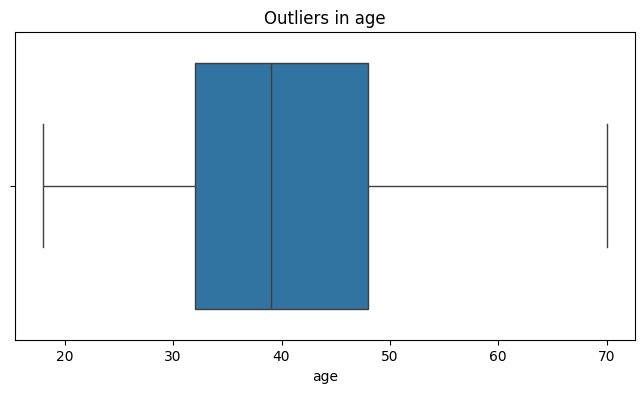

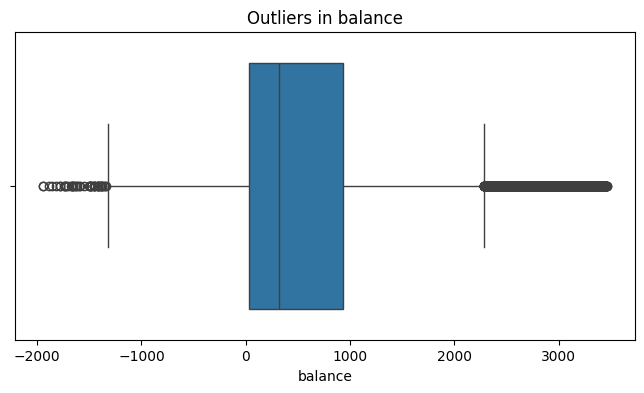

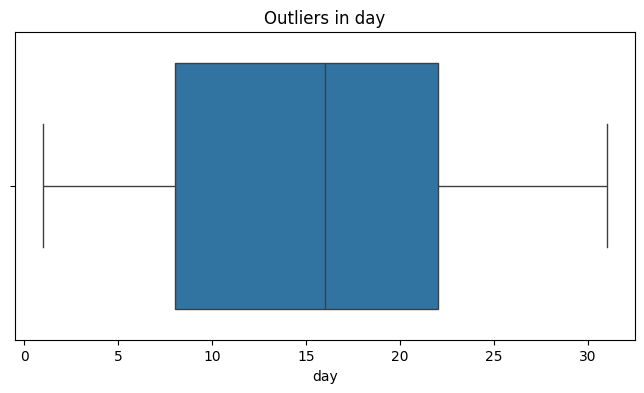

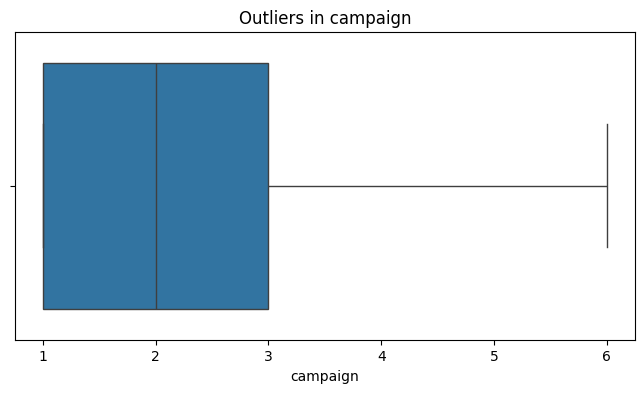

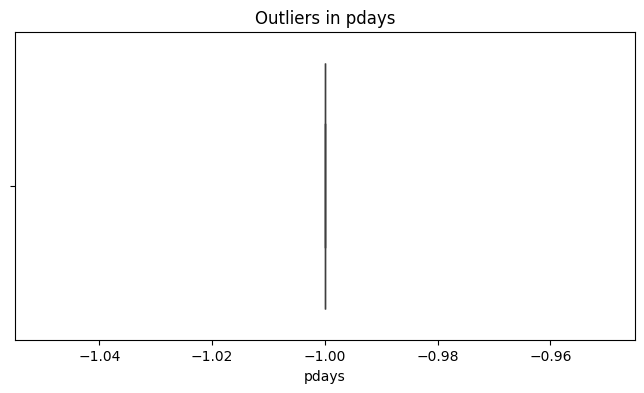

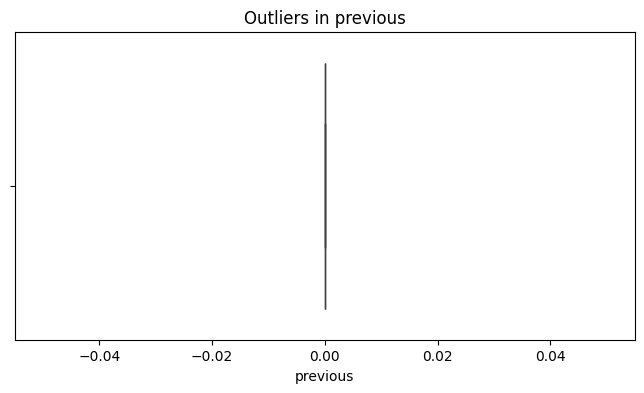

In [38]:
for feature in cleaned_numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_cleaned[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

Random forest implementation

In [ ]:
# label_encoders = {}
# for column in data_cleaned.select_dtypes(include=['object']).columns:
#     if column != 'y':  # Target column
#         le = LabelEncoder()
#         data_cleaned[column] = le.fit_transform(data_cleaned[column])
#         label_encoders[column] = le

# # Encode the target column
# data_cleaned['y'] = data_cleaned['y'].apply(lambda x: 1 if x == 'yes' else 0)

# # Define features and target
# X = data_cleaned.drop('y', axis=1)
# y = data_cleaned['y']
# Code for label encoding

In [40]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

df_final = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=False)

In [41]:
df_final = df_final.astype(int)
print(df_final['y_no'].unique())
print(df_final['y_yes'].unique())


[1 0]
[0 1]


In [42]:
df_final['y'] = df_final['y_yes']  # Use 'y_yes' as the target (1 for yes, 0 for no)
df_final = df_final.drop(['y_no', 'y_yes'], axis=1)  
# Define features and target
X = df_final.drop('y', axis=1)
y = df_final['y']

In [43]:
df_final.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown,y
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("OOB Score:", rf_model.oob_score_)


Confusion Matrix:
[[8180  137]
 [ 714   91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8317
           1       0.40      0.11      0.18       805

    accuracy                           0.91      9122
   macro avg       0.66      0.55      0.56      9122
weighted avg       0.87      0.91      0.88      9122


Accuracy Score:
0.9067090550317912
OOB Score: 0.9502138844508581


In [55]:
# Using bagging:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, max_samples=1.0, oob_score=True
)

# Train the model
bag_model.fit(X_train, y_train)

# Make predictions
ybagging_pred = bag_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, ybagging_pred))

print("\nClassification Report:")
print(classification_report(y_test, ybagging_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, ybagging_pred))

print("OOB Score:", rf_model.oob_score_)


Confusion Matrix:
[[8174  143]
 [ 701  104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8317
           1       0.42      0.13      0.20       805

    accuracy                           0.91      9122
   macro avg       0.67      0.56      0.57      9122
weighted avg       0.88      0.91      0.88      9122


Accuracy Score:
0.907476430607323
OOB Score: 0.9502138844508581



Max Depth: 3
Training Score: 0.9137
Testing Score: 0.9125
OOB Score: 0.9113
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8317
           1       0.61      0.02      0.05       805

    accuracy                           0.91      9122
   macro avg       0.76      0.51      0.50      9122
weighted avg       0.89      0.91      0.87      9122


Max Depth: 5
Training Score: 0.9151
Testing Score: 0.9121
OOB Score: 0.9120
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8317
           1       0.53      0.03      0.06       805

    accuracy                           0.91      9122
   macro avg       0.72      0.51      0.51      9122
weighted avg       0.88      0.91      0.88      9122


Max Depth: 7
Training Score: 0.9201
Testing Score: 0.9114
OOB Score: 0.9111
Classification Report:
              precision    recall  f1-score   

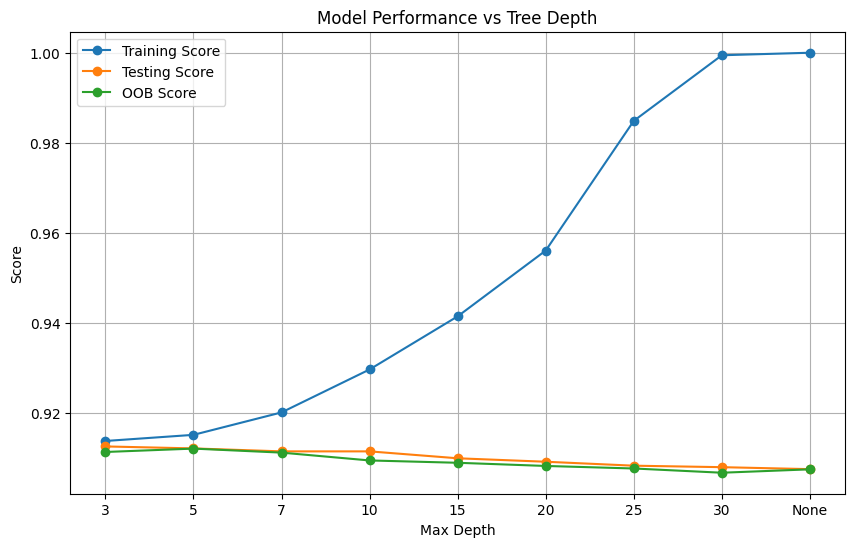

In [56]:
max_depths = [3, 5, 7, 10, 15, 20, 25, 30, None]

# Lists to store metrics
train_scores = []
test_scores = []
oob_scores = []

for depth in max_depths:
    # Create BaggingClassifier with specified tree depth
    bag_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=depth),
        n_estimators=100,
        random_state=42,
        max_samples=1.0,
        oob_score=True
    )
    
    # Train model
    bag_model.fit(X_train, y_train)
    
    # Get scores
    train_score = bag_model.score(X_train, y_train)
    test_score = bag_model.score(X_test, y_test)
    oob_score = bag_model.oob_score_
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    oob_scores.append(oob_score)
    
    print(f"\nMax Depth: {depth}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"OOB Score: {oob_score:.4f}")
    print("Classification Report:")
    y_pred = bag_model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(max_depths)), train_scores, marker='o', label='Training Score')
plt.plot(range(len(max_depths)), test_scores, marker='o', label='Testing Score')
plt.plot(range(len(max_depths)), oob_scores, marker='o', label='OOB Score')
plt.xticks(range(len(max_depths)), [str(d) if d else 'None' for d in max_depths])
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Model Performance vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
n_estimators_list = [50, 100, 200, 300]

# Lists to store metrics
train_scores = []
test_scores = []
oob_scores = []

for estim in n_estimators_list:
    # Create BaggingClassifier with specified tree depth
    bag_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=estim,
        random_state=42,
        max_samples=1.0,
        oob_score=True
    )
    
    # Train model
    bag_model.fit(X_train, y_train)
    
    # Get scores
    train_score = bag_model.score(X_train, y_train)
    test_score = bag_model.score(X_test, y_test)
    oob_score = bag_model.oob_score_
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    oob_scores.append(oob_score)
    
    print(f"\nnumder of trees: {estim}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"OOB Score: {oob_score:.4f}")
    print("Classification Report:")
    y_pred = bag_model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Plot results



numder of trees: 50
Training Score: 0.9987
Testing Score: 0.9076
OOB Score: 0.9064
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8317
           1       0.42      0.13      0.20       805

    accuracy                           0.91      9122
   macro avg       0.67      0.56      0.58      9122
weighted avg       0.88      0.91      0.88      9122


numder of trees: 100
Training Score: 1.0000
Testing Score: 0.9075
OOB Score: 0.9074
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8317
           1       0.42      0.13      0.20       805

    accuracy                           0.91      9122
   macro avg       0.67      0.56      0.57      9122
weighted avg       0.88      0.91      0.88      9122


numder of trees: 200
Training Score: 1.0000
Testing Score: 0.9084
OOB Score: 0.9080
Classification Report:
              precision

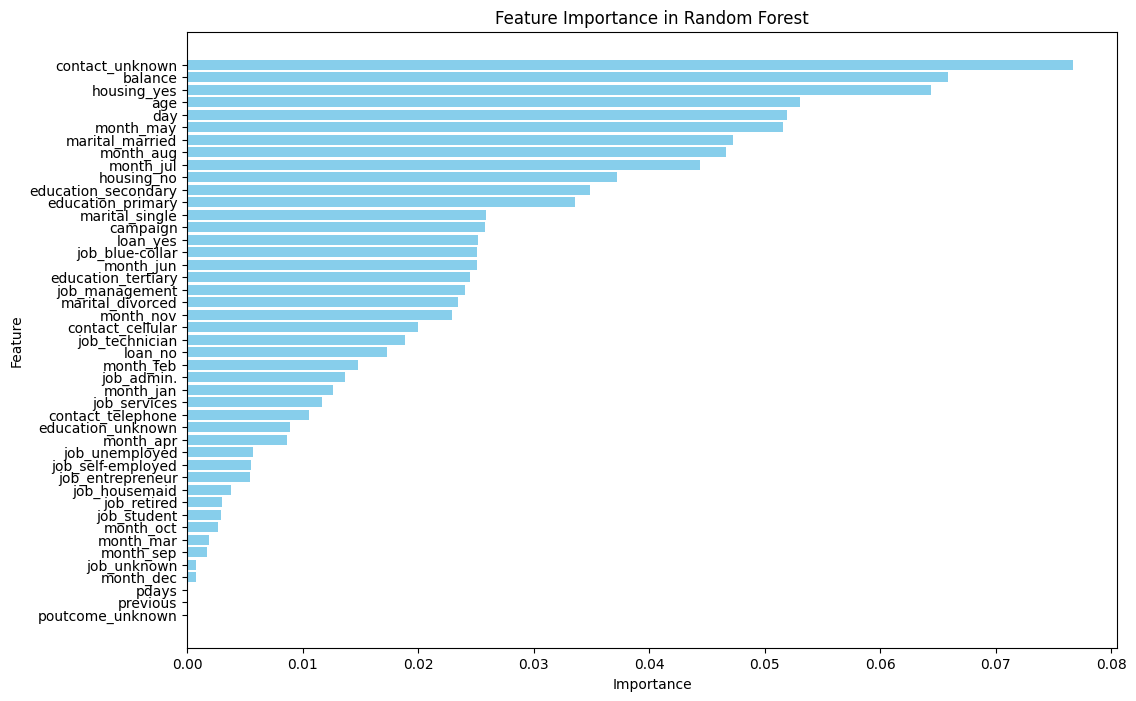

In [46]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns  # Replace with your actual feature names if X is not a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8)) 
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [47]:
print("\nF1 Score (Weighted Average):")
print(f1_score(y_test, y_pred, average='weighted'))


F1 Score (Weighted Average):
0.8822182131379078


In [48]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')  # Or 'weighted'
print (precision)

0.8737792973182518


In [49]:
# Check the balance of the resampled data after SMOTE
print(y_train_smote.value_counts())

# Alternatively, check the normalized distribution after SMOTE
print(y_train_smote.value_counts(normalize=True))

y
0    19403
1    19403
Name: count, dtype: int64
y
0    0.5
1    0.5
Name: proportion, dtype: float64


In [50]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# Build the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

c:\Users\msmam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9014 - loss: 0.2712 - val_accuracy: 0.9123 - val_loss: 0.2694
Epoch 2/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9458 - loss: 0.1665 - val_accuracy: 0.9107 - val_loss: 0.2698
Epoch 3/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9488 - loss: 0.1588 - val_accuracy: 0.9123 - val_loss: 0.2667
Epoch 4/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9500 - loss: 0.1513 - val_accuracy: 0.9102 - val_loss: 0.2688
Epoch 5/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9487 - loss: 0.1538 - val_accuracy: 0.9100 - val_loss: 0.2680
Epoch 6/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9507 - loss: 0.1494 - val_accuracy: 0.9112 - val_loss: 0.2668
Epoch 7/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9510 - loss: 0.1453 - val_accuracy: 0.9120 - val_loss: 0.2645
Epoch 8/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9527 - loss: 0.1438 - 